In [1]:
import os
folder = os.listdir("images")
# emotions = set()
def data_dic():
    path = "images/"
    data_dic = {"img_path" : [], "emotion" : []}
    for f in folder:
        files = os.listdir("images/" + f)
        for file in files:
            data_dic["img_path"].append(path + f + "/" + file)
            data_dic["emotion"].append(file[:-4])
            print(file[:-4])
            # emotions.add(file[:-4])
    return data_dic
data_dic = data_dic()
print(len(data_dic["img_path"]))
# emotions = list(emotions)
# print(emotions)
e_l = {'Sad' : 0, 'Neutral' : 1, 'Happy' : 2, 'Contempt' : 3, 'Anger' : 4, 'Surprised' : 5, 'Fear' : 6, 'Disgust' : 7}

Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Surprised
Anger
Contempt
Disgust
Fear
Happy
Neutral
Sad
Su

In [2]:
def crop(img):
    h = len(img)
    w = len(img[0])
    if(h > w):
        img = img[int((h - w)/ 2) : -int((h - w)/ 2)]
    elif(h < w):
        img = img[:, int((w - h) / 2) : -int((w - h) / 2)]
    
    return img

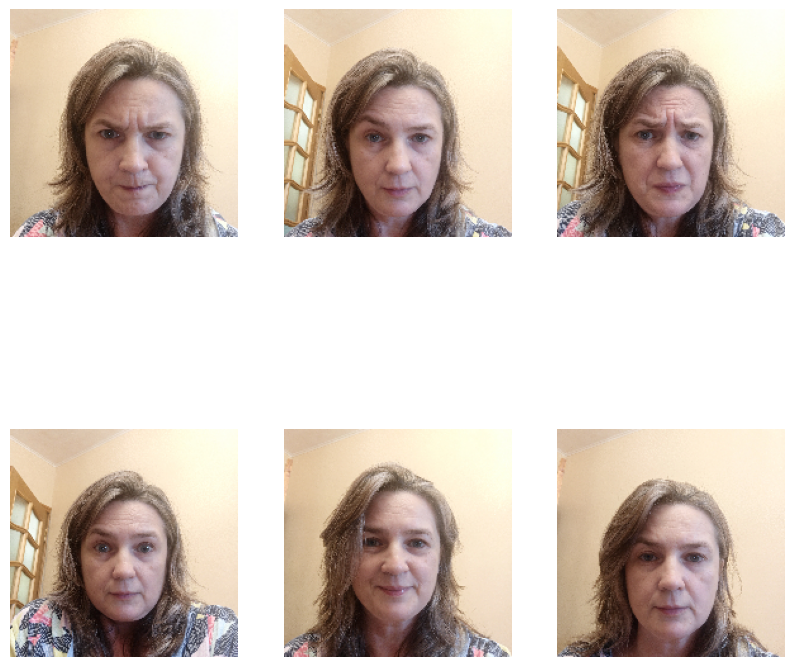

In [3]:
import cv2
import matplotlib.pyplot as plt
tmp = []
j = 2
for i in range(20 + j * 10,26 + j * 10,1):
    img = cv2.imread(data_dic["img_path"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = crop(img) 
    img = cv2.resize(img,(180,180))
    tmp.append(img)
# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for ax, img_array in zip(axes.ravel(), tmp):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

take data path, target 

In [4]:
import cv2
images = []
label = []

for i in range(len(data_dic["img_path"])):
    img = cv2.imread(data_dic["img_path"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = crop(img)
    img = cv2.resize(img,(180,180))
    images.append(img)
#read image

for e in data_dic["emotion"]:
    label.append(e_l[e])    
#convert label to id


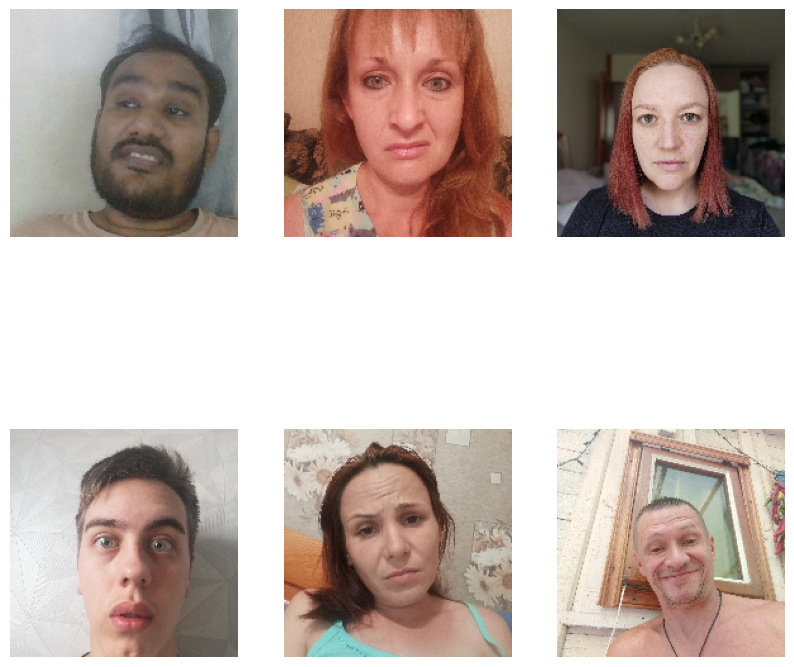

In [5]:
import matplotlib.pyplot as plt
import random
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

show vài ảnh ra

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Normalization
from tensorflow.keras import Input
import tensorflow as tf
model = Sequential([
    Input(shape = images[0].shape),
    Normalization(),
    Conv2D(32, 7, 2),
    Conv2D(32, 7, 1),
    Conv2D(64, 5),
    MaxPooling2D(),
    Conv2D(128, 7, 2),
    Conv2D(128, 7, 1),
    Conv2D(256, 5),
    MaxPooling2D(4,4),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(8, activation = 'softmax')

])
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [7]:
import numpy as np
data = np.array(images)
target = np.array(tf.one_hot(label, 8))
#prepare data

In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test, y_train, y_test=train_test_split(data, target, test_size = 0.2, random_state = 42)


In [9]:
model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
model.save("myModel.h5")

Epoch 1/30
4/4 [==============================] - 10s 2s/step - loss: 2891.8000 - accuracy: 0.1653 - val_loss: 3413.7827 - val_accuracy: 0.0968
Epoch 2/30
4/4 [==============================] - 7s 2s/step - loss: 14805.0781 - accuracy: 0.1322 - val_loss: 12370.1064 - val_accuracy: 0.1290
Epoch 3/30
4/4 [==============================] - 7s 2s/step - loss: 4088.4111 - accuracy: 0.1570 - val_loss: 2508.3523 - val_accuracy: 0.1613
Epoch 4/30
4/4 [==============================] - 7s 2s/step - loss: 1192.6056 - accuracy: 0.2066 - val_loss: 3037.4436 - val_accuracy: 0.0645
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 4203.1470 - accuracy: 0.1653 - val_loss: 11513.3125 - val_accuracy: 0.0968
Epoch 6/30
2/4 [==============>...............] - ETA: 4s - loss: 10203.9453 - accuracy: 0.1094

KeyboardInterrupt: 

In [ ]:
data.shape

(152, 180, 180, 3)